In [60]:
print('np.eye(5):')
print(np.eye(5)) # eye: Identity "I" pronounced as "eye".
print('np.eye(5)[0]:',np.eye(5)[0])
print('np.eye(5)[1]:',np.eye(5)[1])
print('np.eye(10)[7]:',np.eye(10)[7])
cats = 0
dogs = 1
# convert the scale value into one-hot vector.
# no-hot: [0, 0], cat: [1, 0], dog: [0, 1]

np.eye(5):
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
np.eye(5)[0]: [1. 0. 0. 0. 0.]
np.eye(5)[1]: [0. 1. 0. 0. 0.]
np.eye(10)[7]: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [2]:
import os # OS come with Python
import cv2            # pip3 install opencv-python
import numpy as np    # pip3 install numpy
from tqdm import tqdm # pip3 install tqdm

In [17]:
# set to true to one once, then back to false unless you want to change something in your training data.
REBUILD_DATA = True 
class DogsVSCats():
    IMG_SIZE = 50
    CATS = "../../keggle_data/PetImages/Cat"
    DOGS = "../../keggle_data/PetImages/Dog"
    #CATS = "PetImages/Cat"
    #DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0
    def make_training_data(self):
        icnt = 0
        for label in self.LABELS:
            print('label:', label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                        # do something like print(np.eye(2)[1]), just makes one_hot
                        if icnt <= 5 or (icnt > 4000 and icnt <= 4005):
                            print('icnt:', icnt, 'eye:', np.eye(2)[self.LABELS[label]])
                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1
                    except Exception as e:
                        pass
                        #print(label, f, str(e))
                icnt += 1
        np.random.shuffle(self.training_data)
        #np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)
    
    def get_training_data(self):
        return self.training_data

    def print_training_data(self):
        print(self.training_data[:1])
        #for data in self.training_data:
        #    print(data)

if REBUILD_DATA:
    training_data = []
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()
    dogsvcats.print_training_data()
    training_data = dogsvcats.get_training_data()
    print('len(training_data):', len(training_data))

label: ../../keggle_data/PetImages/Cat


  3%|█▏                                    | 123/4001 [00:00<00:03, 1221.43it/s]

icnt: 0 eye: [1. 0.]
icnt: 1 eye: [1. 0.]
icnt: 2 eye: [1. 0.]
icnt: 3 eye: [1. 0.]
icnt: 4 eye: [1. 0.]
icnt: 5 eye: [1. 0.]


100%|█████████████████████████████████████| 4001/4001 [00:02<00:00, 1756.49it/s]


label: ../../keggle_data/PetImages/Dog


  4%|█▌                                    | 165/4006 [00:00<00:02, 1641.20it/s]

icnt: 4001 eye: [0. 1.]
icnt: 4002 eye: [0. 1.]
icnt: 4003 eye: [0. 1.]
icnt: 4004 eye: [0. 1.]
icnt: 4005 eye: [0. 1.]


100%|█████████████████████████████████████| 4006/4006 [00:02<00:00, 1641.43it/s]

Cats: 4000
Dogs: 4005
[[array([[ 67,  76,  73, ..., 122, 129,  92],
       [ 83,  76,  71, ..., 122, 102, 120],
       [ 83,  76,  82, ..., 128,  97, 122],
       ...,
       [133, 135, 146, ..., 161, 162, 162],
       [125, 116, 135, ..., 162, 163, 154],
       [132, 119, 132, ..., 156, 154, 159]], dtype=uint8), array([0., 1.])]]
len(training_data): 8005


In [9]:
print(training_data[1])

[array([[ 41,  24,  30, ..., 142, 132, 126],
       [ 19,  26,  50, ..., 146, 138, 130],
       [ 56,  73,  85, ..., 147, 142, 135],
       ...,
       [182, 192, 192, ..., 126, 123, 112],
       [180, 187, 195, ..., 124, 122, 125],
       [169, 189, 195, ..., 127, 116, 112]], dtype=uint8), array([1., 0.])]


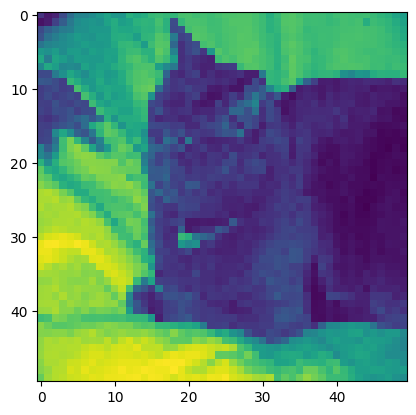

In [10]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1][0])
plt.show()

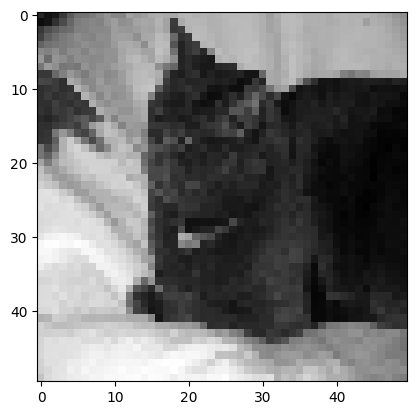

In [11]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1][0], cmap="gray")
plt.show()

In [12]:
print(training_data[5000])

[array([[ 27,  21,  20, ..., 143, 117, 114],
       [ 31,  24,  19, ..., 143, 134, 105],
       [ 32,  26,  25, ..., 152, 134, 109],
       ...,
       [ 19,  32,  10, ..., 138, 104, 102],
       [ 19,  32,   7, ..., 104, 108,  93],
       [ 20,  35,  14, ..., 108,  96,  88]], dtype=uint8), array([0., 1.])]


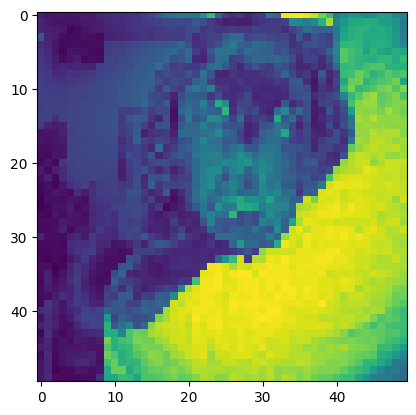

In [13]:
import matplotlib.pyplot as plt
plt.imshow(training_data[5000][0])
plt.show()

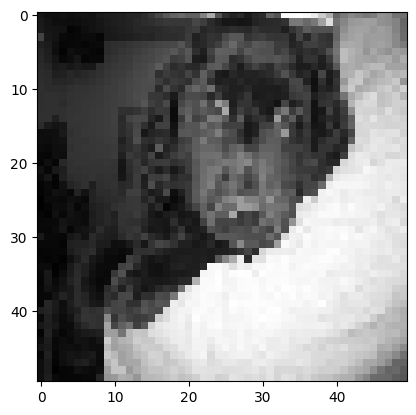

In [14]:
import matplotlib.pyplot as plt
plt.imshow(training_data[5000][0], cmap="gray")
plt.show()

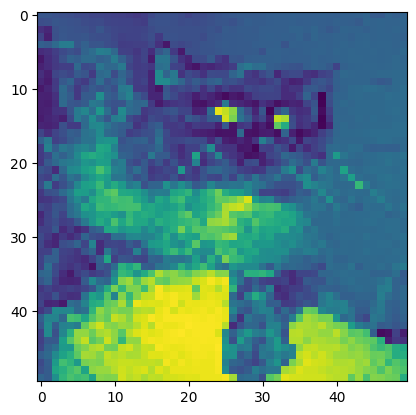

In [15]:
import matplotlib.pyplot as plt
plt.imshow(training_data[8000][0])
plt.show()

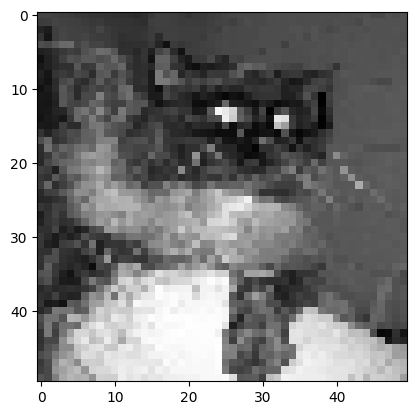

In [16]:
import matplotlib.pyplot as plt
plt.imshow(training_data[8000][0], cmap="gray")
plt.show()